--INPUTS--
velocidade de fluido: 17
número Mach: 0.050445103857566766
viscosidade cinemática: 0.00001629
dados para a_0
cl do primeiro ponto: 0.006
alpha do primeiro ponto: -10
cl do segundo ponto: 1.163
alpha do segundo ponto: 0
cl máximo do perfil: 2.128
alpha_0 do perfil: -10.1
área molhada: 0.906
peso da aeronave: 78.48
nmax: 2.5
tipo da asa: 
 1 - asa retangular 
 2 - asa trapezoidal 
 3 - asa elíptica 
 4 - asa mista 
1
envergadura:2
corda na raiz: 0.255

--OUTPUTS--
--dados da asa--
área de asa: 0.51
alongamento AR: 7.8431372549019605
afilamento: 1.0
corda média: 0.255
coeficiente a_0 cl do perfil: 0.1157
fator de arrasto induzido para AR = 7.8431372549019605:0.09
coeficiente a CL da asa: 0.08946429679150114
fator eficiencia envergadura e: 0.9174311926605504
constante de proporcionalidade K: 0.05898282190985642
CLmax da asa: 1.6454626065022857
--número de reynolds--
Re: 266114.18047882133
continuar com esse valor para Re? S ou NN
informe novo valor:270000
novo valor de Re: 27000

<function matplotlib.pyplot.show(*args, **kw)>

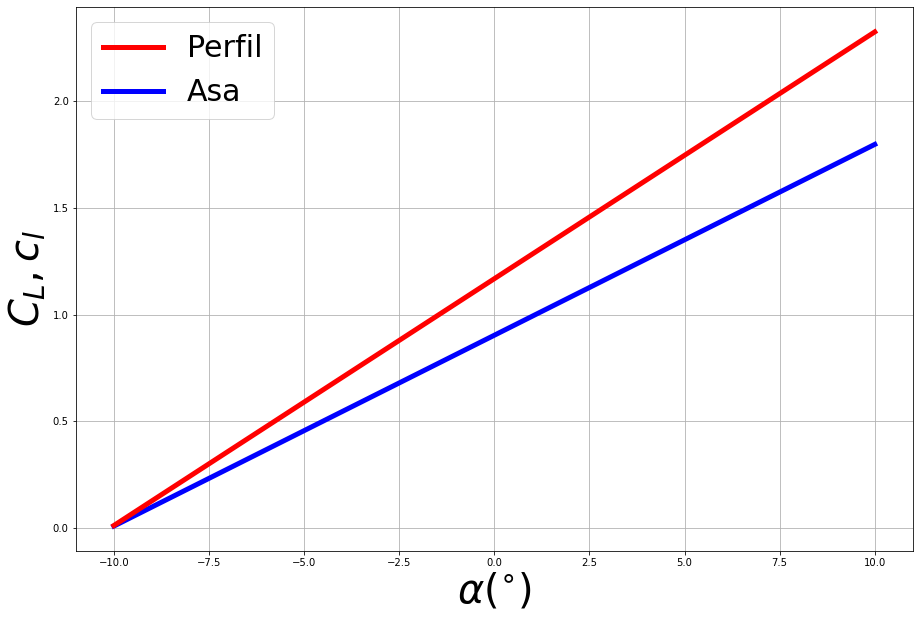

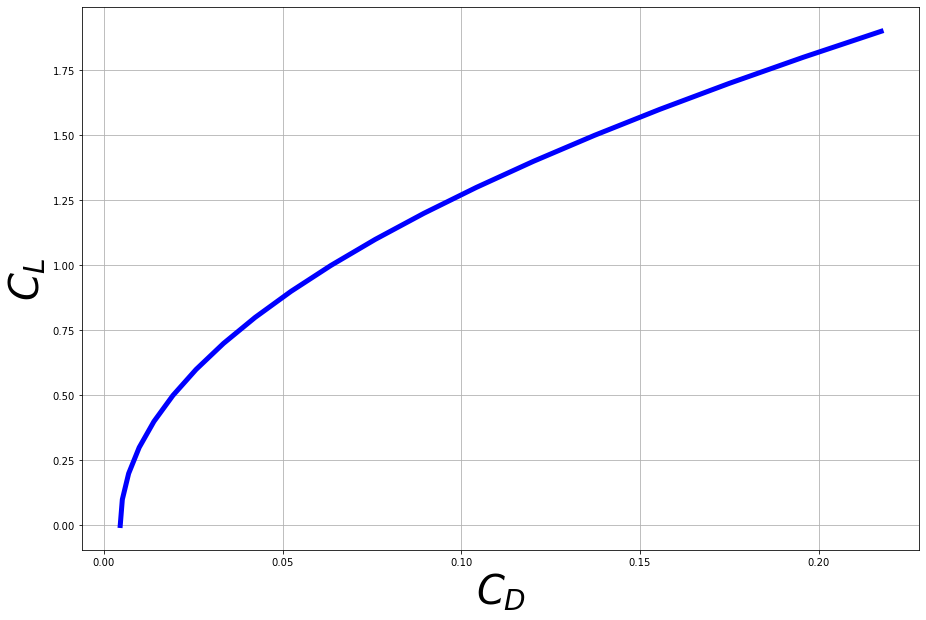

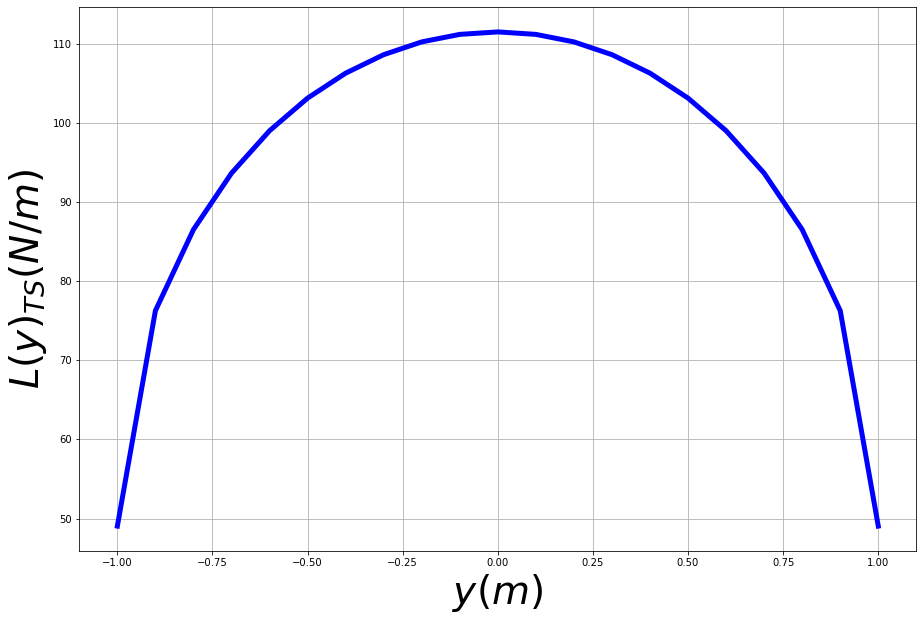

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

# INPUTS
print('--INPUTS--')
v = float(input('velocidade de fluido: '))
mach = v/337
print(f'número Mach: {mach}')
nhi = float(input('viscosidade cinemática: '))
print('dados para a_0')
cl1 = float(input('cl do primeiro ponto: '))
alpha1 = float(input('alpha do primeiro ponto: '))
cl2 = float(input('cl do segundo ponto: '))
alpha2 = float(input('alpha do segundo ponto: '))
clmax = float(input('cl máximo do perfil: '))
alpha_0 = float(input('alpha_0 do perfil: '))
Swet = float(input('área molhada: '))
W = float(input('peso da aeronave: '))
nmax = float(input('nmax: '))
tipo = input('tipo da asa: \n 1 - asa retangular \n 2 - asa trapezoidal \n 3 - asa elíptica \n 4 - asa mista \n')
b = float(input('envergadura:'))
c_r = float(input('corda na raiz: '))

# OUTPUTS


print('\n--OUTPUTS--')

# Calculo área de asa

print('--dados da asa--')
if tipo == '1':
    S = b*c_r
    print(f'área de asa: {S}')
elif tipo == '2': 
    c_t = float(input('corda na ponta:'))
    S = ((c_r + c_t)*b)/2
    print(f'área de asa: {S}')
elif tipo == '3':
    S = (math.pi/4)*b*c_r
    print(f'área de asa: {S}')
elif tipo == '4':
    b_2 = float(input('comprimento da parte retangular:'))
    c_t = float(input('corda na ponta:'))
    S = b_2*c_r + (c_r + c_t)*((b-b_2)/2)
    print(f'área de asa: {S}')
    
# Alongamento

AR = (b**2)/S
print(f'alongamento AR: {AR}')

# Afilamento

if tipo == '1':
    lambd = c_r/c_r
elif tipo == '2' or '4':
    lambd = c_t/c_r
else:
    pass

print(f'afilamento: {lambd}')

# Corda média

if tipo == '1':
    print(f'corda média: {c_r}')
elif tipo == '2' or '4':
    c_med = (2/3)*c_r*((1+lambd+lambd**2)/(1+lambd))
    y_med = (b/6)*((1+(2*lambd))/(1+lambd))
    print(f'corda média: {c_med}')
    print(f'corda média em: {y_med}')
    

# Coeficiente angular a_0 (parte linear do perfil, cl X alpha)

a_0 = (cl2-cl1)/(alpha2-alpha1)
print(f'coeficiente a_0 cl do perfil: {a_0}')
    
# Coeficiente angular a (parte linear do perfil, CL X alpha)

if AR > 4:
    d = float(input(f'fator de arrasto induzido para AR = {AR}:'))
    ef = (1/(1+d))
    a = a_0 / (1+((a_0*57.2958)/(math.pi*AR*ef)))
    Kp = 1 /(math.pi*0.75*ef*AR)
    print(f'coeficiente a CL da asa: {a}')
    print(f'fator eficiencia envergadura e: {ef}')
    print(f'constante de proporcionalidade K: {Kp}')
else:
    pass

# CL máx da asa

razao = 1-(a/a_0)
CLmax = clmax*(1-(1-(a/a_0)))
print(f'CLmax da asa: {CLmax}')



# Numero de Reynolds

print('--número de reynolds--')
if tipo != '1':
    corda = c_med
else:
    corda = c_r
    
Re = (v*corda)/nhi
print(f'Re: {Re}')
par = ''
while par not in ['S','N']:
    par = input('continuar com esse valor para Re? S ou N') 
    
if par == 'S':
    pass    
elif par == 'N':
    Re = float(input('informe novo valor:'))
    print(f'novo valor de Re: {Re}')

# Coeficiente de atrito equivalente CF (escoamento laminar incompressível)

CF = 1.328/(math.sqrt(Re))
print(f'coeficiente de atrito equivalente CF: {CF}')

# Coeficiente de arrasto parasita

CDo = CF*(Swet/S)
print(f'coeficiente de arrasto parasita CDo: {CDo}')




# Coeficiente de sustentação do projeto

CLx = math.sqrt(CDo/Kp)
print(f'coeficiente de sustentação do projeto CL*: {CLx}')

# Coeficiente de arrasto do projeto

CDx = CDo +Kp*CLx**2
print(f'coeficiente de arrasto do projeto CD*: {CDx}')

# Eficiência máxima da aeronave

Emax = CLx/CDx
print(f'eficiência máxima da aeronave Emax: {Emax}')

# Sustentação no ponto atuante

L = nmax*W
print(f'força de sustentação no ponto atuante: {L}')

# Distribuição de Schrenk

LTS = []
i = []
ii = b/2

for y in np.arange(-ii, ii+0.1,0.1):
    LTS.append((((4*L)/(b*math.pi))*math.sqrt(1-((2*y)/b)**2) + ((2*L)/((1+lambd)*b))*(1+(((2*y)/b)*(lambd-1))))/2)
    i.append(y)


